# DEMO

In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dates = []
prices = []

In [3]:
def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader)	# skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return

In [4]:
get_data('aapl.csv') # calling get_data method by passing the csv file to it

In [5]:
prices

[170.49, 169.03, 167.5, 169.06, 172.48, 169.95]

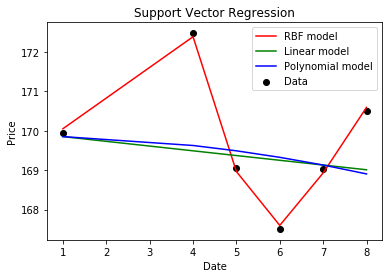

In [6]:
dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

svr_lin = SVR(kernel= 'linear', C= 1e3)
svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
svr_rbf.fit(dates, prices) # fitting the data points in the models
svr_lin.fit(dates, prices)
svr_poly.fit(dates, prices)

plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()



In [7]:
x=29
print(svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0])

169.4096963806241 166.4900000000051 157.25000000187978


# Challenge Video

In [8]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense

/home/german/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
#Step 1 - Insert your API keys
#consumer_key= 'eqZBwpWAAiAPZ47jvVqmSQYha'
#consumer_secret= 'EyojiRGuGv5nT1BrXTc6UbSMlCaNnML0WZL1X3RAUUvDeTMlLj'
#access_token='153628800-geKumfeKgHtK42jZ84cdnJFcwDx12p40IeUJ9pCz'
#access_token_secret='g3H5x1UQ2wuOCiitiYdd1Uy78LrQ49NBZubrPc0x6BhNQ'
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth)
#Step 2 - Search for your company name on Twitter
#public_tweets = api.search('$TSLA')

In [10]:
import glob,path
#for f in glob.glob(str("TSLA/*.csv")):
#    print(f)
TSLA_tweets = pd.concat([pd.read_csv(f, sep=';') for f in glob.glob("TSLA/*.csv")],
                      ignore_index=True)

In [11]:
TSLA_tweets

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,Mnorinsberg,2018-09-28 20:59,0,2,People are missing the big picture about Tesla...,NaN,NaN,NaN,1045825426961108993,https://twitter.com/Mnorinsberg/status/1045825...
1,brentoshi,2018-09-28 20:59,0,1,"Stand out Manhatten, # Scrappy's. Happy Friday...",NaN,NaN,#,1045825416479436800,https://twitter.com/brentoshi/status/104582541...
2,IvanDaDrago,2018-09-28 20:59,0,2,My shoeshine boy is chasing $ TLRY and $ TSLA ...,NaN,NaN,NaN,1045825364604346368,https://twitter.com/IvanDaDrago/status/1045825...
3,CapitalLecter,2018-09-28 20:59,0,0,"As a show of your true faith in Mr. Musk, plea...",NaN,NaN,NaN,1045825329124831233,https://twitter.com/CapitalLecter/status/10458...
4,TeslaOpinion,2018-09-28 20:59,0,1,Still true: Tesla & Musk Hit By Trifecta Of Fo...,NaN,NaN,#,1045825315765837824,https://twitter.com/TeslaOpinion/status/104582...
5,evacuationboy,2018-09-28 20:59,0,0,"Damn man, this $ tsla(Q) meme is like, maui wo...",NaN,NaN,NaN,1045825291204071424,https://twitter.com/evacuationboy/status/10458...
6,oxygenO211,2018-09-28 20:58,0,1,Hope this brings a about a change America desp...,NaN,@,NaN,1045825090800148485,https://twitter.com/oxygenO211/status/10458250...
7,risk_profile,2018-09-28 20:58,0,0,"You have wiped out 20B of Tesla market value, ...",NaN,NaN,NaN,1045825006360563712,https://twitter.com/risk_profile/status/104582...
8,TeslaAnalyst,2018-09-28 20:57,2,5,WSJ: @ elonmusk could have led a go-private tr...,NaN,@,NaN,1045824900114468867,https://twitter.com/TeslaAnalyst/status/104582...
9,2HarryBawlz,2018-09-28 20:57,1,6,$ TSLAQ $ TSLA # Tesla oh wow man...pic.twitte...,NaN,NaN,#,1045824857911554048,https://twitter.com/2HarryBawlz/status/1045824...


In [12]:
TSLA_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 10 columns):
username     4650 non-null object
date         4650 non-null object
retweets     4650 non-null int64
favorites    4650 non-null int64
text         4650 non-null object
geo          0 non-null float64
mentions     778 non-null object
hashtags     666 non-null object
id           4650 non-null int64
permalink    4650 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 363.4+ KB


In [13]:
TSLA_tweets.date = pd.to_datetime(TSLA_tweets.date)
TSLA_tweets.sort_values("date")
TSLA_tweets=TSLA_tweets.reset_index()

In [14]:
TSLA_tweets

,index,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,0,Mnorinsberg,2018-09-28 20:59:00,0,2,People are missing the big picture about Tesla...,NaN,NaN,NaN,1045825426961108993,https://twitter.com/Mnorinsberg/status/1045825...
1,1,brentoshi,2018-09-28 20:59:00,0,1,"Stand out Manhatten, # Scrappy's. Happy Friday...",NaN,NaN,#,1045825416479436800,https://twitter.com/brentoshi/status/104582541...
2,2,IvanDaDrago,2018-09-28 20:59:00,0,2,My shoeshine boy is chasing $ TLRY and $ TSLA ...,NaN,NaN,NaN,1045825364604346368,https://twitter.com/IvanDaDrago/status/1045825...
3,3,CapitalLecter,2018-09-28 20:59:00,0,0,"As a show of your true faith in Mr. Musk, plea...",NaN,NaN,NaN,1045825329124831233,https://twitter.com/CapitalLecter/status/10458...
4,4,TeslaOpinion,2018-09-28 20:59:00,0,1,Still true: Tesla & Musk Hit By Trifecta Of Fo...,NaN,NaN,#,1045825315765837824,https://twitter.com/TeslaOpinion/status/104582...
5,5,evacuationboy,2018-09-28 20:59:00,0,0,"Damn man, this $ tsla(Q) meme is like, maui wo...",NaN,NaN,NaN,1045825291204071424,https://twitter.com/evacuationboy/status/10458...
6,6,oxygenO211,2018-09-28 20:58:00,0,1,Hope this brings a about a change America desp...,NaN,@,NaN,1045825090800148485,https://twitter.com/oxygenO211/status/10458250...
7,7,risk_profile,2018-09-28 20:58:00,0,0,"You have wiped out 20B of Tesla market value, ...",NaN,NaN,NaN,1045825006360563712,https://twitter.com/risk_profile/status/104582...
8,8,TeslaAnalyst,2018-09-28 20:57:00,2,5,WSJ: @ elonmusk could have led a go-private tr...,NaN,@,NaN,1045824900114468867,https://twitter.com/TeslaAnalyst/status/104582...
9,9,2HarryBawlz,2018-09-28 20:57:00,1,6,$ TSLAQ $ TSLA # Tesla oh wow man...pic.twitte...,NaN,NaN,#,1045824857911554048,https://twitter.com/2HarryBawlz/status/1045824...


In [15]:
#Step 3 - Define a threshold for each sentiment to classify each 
#as positive or negative. If the majority of tweets you've collected are positive
#then use your neural network to predict a future price
#for tweet in TSLA_tweets.text.values:
#    analysis = TextBlob(tweet)
#    print(analysis.sentiment,)
TSLA_tweets["sentiment"] = TSLA_tweets.text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
#TSLA_tweets.sentiment
df_sentiment=TSLA_tweets.set_index("date").groupby(pd.TimeGrouper('D')).mean()
df_sentiment.index.name="Date"

/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [17]:
df_prices=pd.read_csv("TSLA_prices.csv",index_col=["Date"])
#df_prices["sentiment"]=df_sentiment["sentiment"]

In [18]:
df_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-28,270.260010,278.000000,260.559998,264.769989,264.769989,33649700
2018-10-01,305.769989,311.440002,301.049988,310.700012,310.700012,21777600
2018-10-02,313.950012,316.839996,299.149994,301.019989,301.019989,11743500
2018-10-03,303.329987,304.600006,291.570007,294.799988,294.799988,7995000
2018-10-04,293.950012,294.000000,277.670013,281.829987,281.829987,9814200


Articulo Autokeras https://towardsdatascience.com/auto-keras-or-how-you-can-create-a-deep-learning-model-in-4-lines-of-code-b2ba448ccf5e



In [19]:
df_sentiment.head()

,index,retweets,favorites,geo,id,sentiment
Date,,,,,,
2018-09-27,2624.5,1.973333,15.346667,NaN,1.045463e+18,0.021669
2018-09-28,74.5,0.160000,1.006667,NaN,1.045825e+18,0.156400
2018-09-29,524.5,0.686667,6.413333,NaN,1.046187e+18,0.111876
2018-09-30,1874.5,0.253333,1.840000,NaN,1.046549e+18,0.062249
2018-10-01,674.5,0.480000,3.726667,NaN,1.046911e+18,0.076978


In [93]:
df_total=df_prices.join(df_sentiment).drop(columns=['geo', 'id',"index","retweets","favorites"])
df_total["date"] = df_total.index
df_total=df_total[["date","Close","sentiment"]]
#df_total.Close=df_total.Close.shift(-1)
#df_total.dropna(inplace=True)
df_total

,date,Close,sentiment
Date,,,
2018-09-28,2018-09-28,264.769989,0.156400
2018-10-01,2018-10-01,310.700012,0.076978
2018-10-02,2018-10-02,301.019989,0.156580
2018-10-03,2018-10-03,294.799988,0.097427
2018-10-04,2018-10-04,281.829987,-0.021239
2018-10-05,2018-10-05,261.950012,-0.038111
2018-10-08,2018-10-08,250.559998,0.053480
2018-10-09,2018-10-09,262.799988,0.112361
2018-10-10,2018-10-10,256.880005,0.154775


In [94]:
df_total.to_csv("TSLA_LAST_MONTH_sentiment.csv")
from sklearn.preprocessing import MinMaxScaler
#df_total=df_total[["Close","sentiment"]]
dataset=df_total[["sentiment","Close"]].values
dataset = dataset.astype('float32')
dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.7917999 , 0.1768732 ],
       [0.46849442, 0.7485688 ],
       [0.79253113, 0.6280806 ],
       [0.5517361 , 0.55065966],
       [0.06868206, 0.3892207 ],
       [0.        , 0.14177275],
       [0.3728401 , 0.        ],
       [0.61253   , 0.15235233],
       [0.78518605, 0.07866573],
       [0.77482736, 0.02078676],
       [0.26994893, 0.10231519],
       [0.41581634, 0.11239743],
       [0.985312  , 0.32399797],
       [0.38155583, 0.2641275 ],
       [0.72145736, 0.16616893],
       [1.        , 0.11750078],
       [0.61455923, 0.12932563],
       [0.75420713, 0.54244494],
       [0.68394434, 0.47224307],
       [0.66968966, 0.8003485 ],
       [0.35025525, 1.        ]], dtype=float32)

In [95]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

14 7


In [103]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

SyntaxError: invalid syntax (<ipython-input-103-0379728f51f2>, line 9)

In [97]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [98]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [101]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.4328
Epoch 2/100
 - 0s - loss: 0.4092
Epoch 3/100
 - 0s - loss: 0.3848
Epoch 4/100
 - 0s - loss: 0.3630
Epoch 5/100
 - 0s - loss: 0.3440
Epoch 6/100
 - 0s - loss: 0.3234
Epoch 7/100
 - 0s - loss: 0.3064
Epoch 8/100
 - 0s - loss: 0.2913
Epoch 9/100
 - 0s - loss: 0.2737
Epoch 10/100
 - 0s - loss: 0.2605
Epoch 11/100
 - 0s - loss: 0.2466
Epoch 12/100
 - 0s - loss: 0.2327
Epoch 13/100
 - 0s - loss: 0.2191
Epoch 14/100
 - 0s - loss: 0.2088
Epoch 15/100
 - 0s - loss: 0.1966
Epoch 16/100
 - 0s - loss: 0.1871
Epoch 17/100
 - 0s - loss: 0.1751
Epoch 18/100
 - 0s - loss: 0.1673
Epoch 19/100
 - 0s - loss: 0.1579
Epoch 20/100
 - 0s - loss: 0.1484
Epoch 21/100
 - 0s - loss: 0.1410
Epoch 22/100
 - 0s - loss: 0.1341
Epoch 23/100
 - 0s - loss: 0.1276
Epoch 24/100
 - 0s - loss: 0.1222
Epoch 25/100
 - 0s - loss: 0.1159
Epoch 26/100
 - 0s - loss: 0.1118
Epoch 27/100
 - 0s - loss: 0.1061
Epoch 28/100
 - 0s - loss: 0.1026
Epoch 29/100
 - 0s - loss: 0.1000
Epoch 30/100
 - 0s - lo

In [102]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: non-broadcastable output operand with shape (12,1) doesn't match the broadcast shape (12,2)

In [84]:
#clf = ak.Supervised()
#clf.fit(x_train, y_train)
#results = clf.predict(x_test)
x=X_train

In [ ]:
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1) ))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =16, nb_epoch =25, shuffle = False)
